# Descartes Lab Mobility Changes Analysis

### Background
Reference: https://www.descarteslabs.com/wp-content/uploads/2020/03/mobility-v097.pdf<br>
DL uses anonymized
and/or de-identified mobile device locations to measure mobility,
a statistic representing the distance a typical member of a given
population moves in a day. Results indicate that a large reduction
in mobility has taken place, both in the US and globally.

$m50$: The median of the max-distance mobility for all samples in the specified region.  
$m50\_index$: The percent of normal m50 in the region, with normal m50 defined during 2020-02-17 to 2020-03-07.
$$m50\_index = 100 \times \frac{m50}{m50_{norm}}$$

In [ ]:
import git
import matplotlib.pyplot as plt
import os
import pandas as pd

In [ ]:
repo = git.Repo("./", search_parent_directories=True)
home_dir = repo.working_dir
data_dir = f'{home_dir}/data/us/mobility'

In [3]:
# Data contains information about states and counties with states listed before their respective counties
df = pd.read_csv(os.path.join(data_dir, 'DL-us-mobility-daterow.csv'))
df.head()

,date,country_code,admin_level,admin1,admin2,fips,samples,m50,m50_index
0,2020-03-01,US,1,Alabama,NaN,1.0,133826,8.331,79
1,2020-03-02,US,1,Alabama,NaN,1.0,143632,10.398,98
2,2020-03-03,US,1,Alabama,NaN,1.0,146009,10.538,100
3,2020-03-04,US,1,Alabama,NaN,1.0,149352,10.144,96
4,2020-03-05,US,1,Alabama,NaN,1.0,144109,10.982,104


In [4]:
df.tail()

,date,country_code,admin_level,admin1,admin2,fips,samples,m50,m50_index
93368,2020-03-31,US,2,Wyoming,Uinta County,56041.0,410,2.840,90
93369,2020-04-01,US,2,Wyoming,Uinta County,56041.0,397,2.983,95
93370,2020-04-02,US,2,Wyoming,Uinta County,56041.0,405,3.308,105
93371,2020-04-03,US,2,Wyoming,Uinta County,56041.0,365,3.633,116
93372,2020-04-04,US,2,Wyoming,Uinta County,56041.0,375,2.153,68


In [5]:
dates = df.date.unique()
states = df[df['admin_level'] == 1]
counties = df[df['admin_level'] == 2]

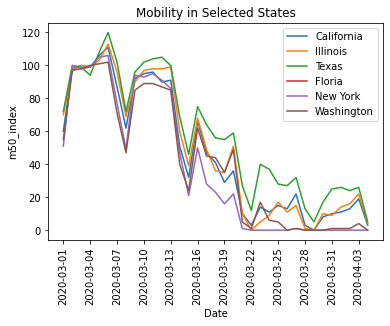

In [6]:
selected_states = ['California', 'Illinois', 'Texas', 'Floria', 'New York', 'Washington']

for state in selected_states:
    state_data = states[states['admin1'] == state]
    plt.plot(state_data['date'], state_data['m50_index'], label=state)

plt.title('Mobility in Selected States')
plt.xlabel('Date')
plt.xticks(ticks = range(0, len(dates), 3), rotation=90)
plt.ylabel('m50_index')
plt.legend()
plt.show()

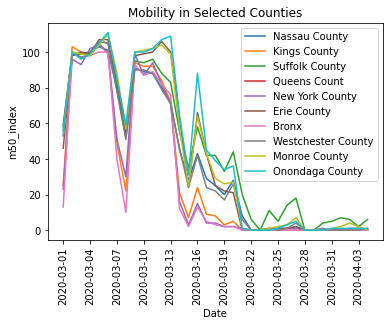

In [7]:
selected_counties = ['Nassau County', 'Kings County', 'Suffolk County', 'Queens Count', 'New York County',
                    'Erie County', 'Bronx', 'Westchester County', 'Monroe County', 'Onondaga County']

for county in selected_counties:
    county_data = counties[counties['admin1'] == 'New York']
    county_data = county_data[county_data['admin2'] == county]
    plt.plot(county_data['date'], county_data['m50_index'], label=county)

plt.title('Mobility in Selected Counties')
plt.xlabel('Date')
plt.xticks(ticks = range(0, len(dates), 3), rotation=90)
plt.ylabel('m50_index')
plt.legend()
plt.show()